In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

In [2]:
labels_pd = pd.read_csv("./labels.csv")
counts_pd = pd.read_csv("./processed_counts.csv")

In [3]:
labels_pd.index = labels_pd['index']
labels_pd.drop("index", axis=1, inplace=True)
counts_pd.index = counts_pd['Unnamed: 0']
counts_pd.drop("Unnamed: 0", axis=1, inplace=True)

df = counts_pd.merge(labels_pd, left_index=True, right_index=True).dropna()
df

,HES4,TNFRSF4,SSU72,PARK7,RBP7,SRM,MAD2L2,AGTRAP,TNFRSF1B,EFHD2,...,MRPS6,TTC3,U2AF1,CSTB,SUMO3,ITGB2,S100B,PRMT2,MT-ND3,bulk_labels
AAAGCCTGGCTAAC-1,-0.326,-0.191,-0.728,-0.301,3.386,-0.531,2.016,3.377,4.841,-0.525,...,-0.532,-0.341,0.303,1.404,4.294,0.519,-0.21,-0.636,4.011,CD14+ Monocyte
AAATTCGATGCACA-1,1.171,-0.191,0.795,-1.200,-0.174,-0.531,1.889,-0.486,-0.459,-0.525,...,-0.532,-0.341,-0.905,2.849,-0.585,1.172,-0.21,2.630,-0.490,Dendritic
AACACGTGGTCTTT-1,-0.326,-0.191,0.483,-1.200,-0.174,-0.531,-0.451,0.971,-0.459,2.286,...,2.606,-0.341,-0.905,-0.455,-0.585,0.722,-0.21,0.663,-0.490,CD56+ NK
AAGTGCACGTGCTA-1,-0.326,-0.191,1.134,-0.157,-0.174,-0.531,-0.451,-0.486,-0.459,-0.525,...,-0.532,-0.341,-0.905,-0.119,-0.585,0.766,-0.21,-0.636,-0.490,CD4+/CD25 T Reg
ACACGAACGGAGTG-1,-0.326,-0.191,-0.728,-0.607,-0.174,-0.531,-0.451,0.787,-0.459,1.932,...,0.839,1.679,-0.108,-0.534,-0.585,-0.007,-0.21,-0.636,-0.490,Dendritic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGGCACCTCCAACA-8,-0.326,-0.191,0.372,-0.584,-0.174,0.509,-0.451,2.160,-0.459,0.751,...,-0.532,1.758,1.578,0.055,-0.585,0.561,-0.21,0.543,2.593,Dendritic
TGTGAGTGCTTTAC-8,3.166,-0.191,-0.728,-1.200,-0.174,-0.531,-0.451,-0.486,-0.459,1.536,...,-0.532,-0.341,0.432,0.753,-0.585,-0.171,-0.21,1.268,-0.490,Dendritic
TGTTACTGGCGATT-8,-0.326,-0.191,-0.728,-1.200,-0.174,1.784,-0.451,-0.486,-0.459,-0.525,...,-0.532,-0.341,1.858,0.814,-0.585,0.152,-0.21,-0.636,1.226,CD4+/CD25 T Reg
TTCAGTACCGGGAA-8,-0.326,-0.191,-0.728,-0.386,-0.174,-0.531,-0.451,-0.486,-0.459,-0.525,...,-0.532,-0.341,2.378,0.420,0.888,-0.326,-0.21,-0.636,-0.490,CD19+ B


In [4]:
categories = df['bulk_labels'].unique()
print(categories)

#one-hot encoding
y = np.zeros((len(df), len(categories)))
for i in range(len(df)):
  cell_type = df.iloc[i]['bulk_labels']
  pos = np.where(categories == cell_type)[0]
  y[i, pos] = 1

#remove label when processing input data
X = df.drop('bulk_labels', axis=1).values

#shufle and 80:20 split
np.random.seed(100)
permutation = np.random.permutation(len(X))
X, y = X[permutation], y[permutation]

X_train, y_train = X[:int(len(X)*0.8)], y[:int(len(y)*0.8)]
X_val, y_val = X[int(len(X)*0.8):], y[int(len(y)*0.8):]

['CD14+ Monocyte' 'Dendritic' 'CD56+ NK' 'CD4+/CD25 T Reg' 'CD19+ B'
 'CD8+ Cytotoxic T' 'CD4+/CD45RO+ Memory' 'CD8+/CD45RA+ Naive Cytotoxic'
 'CD4+/CD45RA+/CD25- Naive T' 'CD34+']


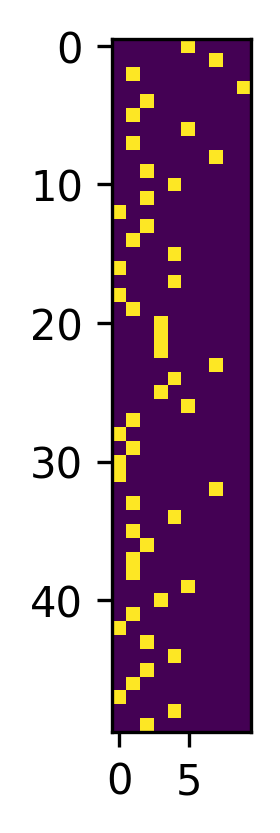

In [5]:
#Visualize the One-hot encoded Prediction Labels
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3), dpi=300)
plt.imshow(y_train[:50])

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score
import copy

# Reshape input data to 2D arrays
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_val_2d = X_val.reshape(X_val.shape[0], -1)
y_train_1d = y_train.argmax(axis=1)
y_val_1d = y_val.argmax(axis=1)

class My_Network(nn.Module):
    def __init__(self, input_dim=765, output_dim=10):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        # Input layer
        self.input_layer = nn.Linear(input_dim, 512)
        self.input_bn = nn.BatchNorm1d(512)
        # Hidden layers
        self.hidden_layer1 = nn.Linear(512, 256)
        self.hidden_bn1 = nn.BatchNorm1d(256)
        self.hidden_layer2 = nn.Linear(256, 128)
        self.hidden_bn2 = nn.BatchNorm1d(128)
        # Output layer
        self.output_layer = nn.Linear(128, output_dim)

    def forward(self, X):
        X = self.input_layer(X)
        X = self.input_bn(X)
        X = F.relu(X)
        X = self.hidden_layer1(X)
        X = self.hidden_bn1(X)
        X = F.relu(X)
        X = self.hidden_layer2(X)
        X = self.hidden_bn2(X)
        X = F.relu(X)
        logits = self.output_layer(X)
        return logits

    def classify(self, X):
        logits = self.forward(X)
        probabilities = F.softmax(logits, dim=1)
        labels = torch.argmax(probabilities, dim=1)
        return labels

def train(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32, lr=1e-3, patience=5):
    """
    Train the model with the given training loop, backtracking mechanism, and model preservation.
    """
    batches = len(X_train) // batch_size
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    losses = []
    train_accs = []
    accuracies = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model = None

    for epoch in range(epochs):
        epoch_loss = 0
        train_acc = 0
        for i in range(batches):
            start = i * batch_size
            end = start + batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]

            logits = model(X_batch)
            loss = loss_fn(logits, y_batch)
            epoch_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = logits.max(1)[1]
            train_acc += accuracy_score(y_batch.cpu().numpy(), y_pred.cpu().numpy())

        train_acc /= batches
        train_accs.append(train_acc)

        val_logits = model(X_val)
        val_loss = loss_fn(val_logits, y_val)
        losses.append(val_loss.item())

        val_y_pred = val_logits.max(1)[1]
        accuracy = accuracy_score(y_val.cpu().numpy(), val_y_pred.cpu().numpy())
        accuracies.append(accuracy)

        print(f"Epoch {epoch}:\tloss {val_loss.item()} & accuracy {accuracy}")

        # Backtracking mechanism and model preservation
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model = copy.deepcopy(model)
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Restarting model due to lack of improvement.")
            model.apply(reset_weights)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)
            patience_counter = 0

    return losses, accuracies, train_accs, best_model

def reset_weights(m):
    """
    Helper function to reset the weights of a PyTorch module.
    """
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.zero_()

def evaluate(model, X_val, y_val):
    model.eval()
    val_logits = model(X_val)
    val_y_pred = val_logits.max(1)[1]
    val_acc = accuracy_score(y_val.cpu().numpy(), val_y_pred.cpu().numpy())
    print(f"Validation Accuracy: {val_acc:.4f}")

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_2d, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_1d, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_2d, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_1d, dtype=torch.long)

# Instantiate the model
num_classes = len(categories)
model = My_Network(input_dim=765, output_dim=10)

# Train the model
losses, accuracies, train_accs, best_model = train(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)

# Evaluate the model
evaluate(best_model, X_val_tensor, y_val_tensor)

Epoch 0:	loss 0.7643473744392395 & accuracy 0.7928571428571428
Epoch 1:	loss 0.591118335723877 & accuracy 0.8428571428571429
Epoch 2:	loss 0.519807755947113 & accuracy 0.8428571428571429
Epoch 3:	loss 0.5055451989173889 & accuracy 0.8357142857142857
Epoch 4:	loss 0.4956263303756714 & accuracy 0.8357142857142857
Epoch 5:	loss 0.49724018573760986 & accuracy 0.8285714285714286
Epoch 6:	loss 0.49916812777519226 & accuracy 0.8214285714285714
Epoch 7:	loss 0.5014583468437195 & accuracy 0.8285714285714286
Epoch 8:	loss 0.5041205286979675 & accuracy 0.8285714285714286
Epoch 9:	loss 0.506899893283844 & accuracy 0.8285714285714286
Restarting model due to lack of improvement.
Epoch 10:	loss 0.7427104115486145 & accuracy 0.7785714285714286
Epoch 11:	loss 0.5789472460746765 & accuracy 0.8071428571428572
Epoch 12:	loss 0.551543116569519 & accuracy 0.8214285714285714
Epoch 13:	loss 0.5537633895874023 & accuracy 0.8214285714285714
Epoch 14:	loss 0.5573642253875732 & accuracy 0.8285714285714286
Restart

Epoch 0:	loss 0.6610638499259949 & accuracy 0.7357142857142858
Epoch 1:	loss 0.5785185098648071 & accuracy 0.7857142857142857
Epoch 2:	loss 0.5757061839103699 & accuracy 0.8071428571428572
Epoch 3:	loss 0.5746449828147888 & accuracy 0.8
Epoch 4:	loss 0.5754792094230652 & accuracy 0.8
Epoch 5:	loss 0.579071044921875 & accuracy 0.8
Epoch 6:	loss 0.5831989645957947 & accuracy 0.8
Epoch 7:	loss 0.5868788361549377 & accuracy 0.8
Epoch 8:	loss 0.5901869535446167 & accuracy 0.8
Restarting model due to lack of improvement.
Epoch 9:	loss 0.6447202563285828 & accuracy 0.8071428571428572
Epoch 10:	loss 0.5444724559783936 & accuracy 0.8357142857142857
Epoch 11:	loss 0.5358249545097351 & accuracy 0.7928571428571428
Epoch 12:	loss 0.5292776226997375 & accuracy 0.8142857142857143
Epoch 13:	loss 0.5294270515441895 & accuracy 0.8285714285714286
Epoch 14:	loss 0.5320345163345337 & accuracy 0.8285714285714286
Epoch 15:	loss 0.5349404811859131 & accuracy 0.8357142857142857
Epoch 16:	loss 0.537432193756103

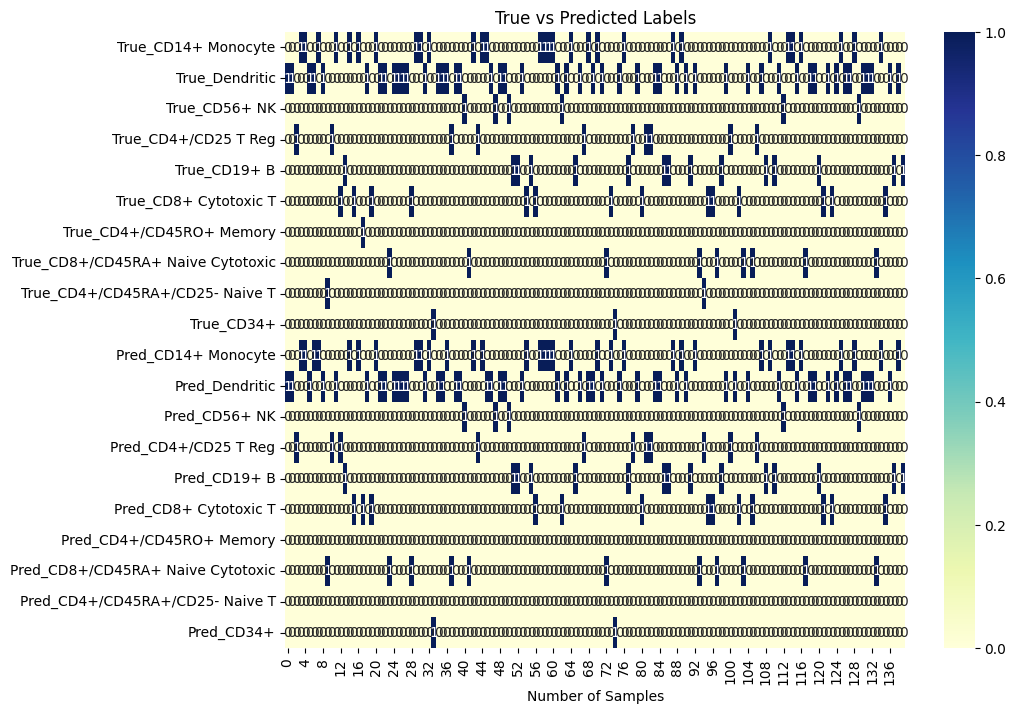

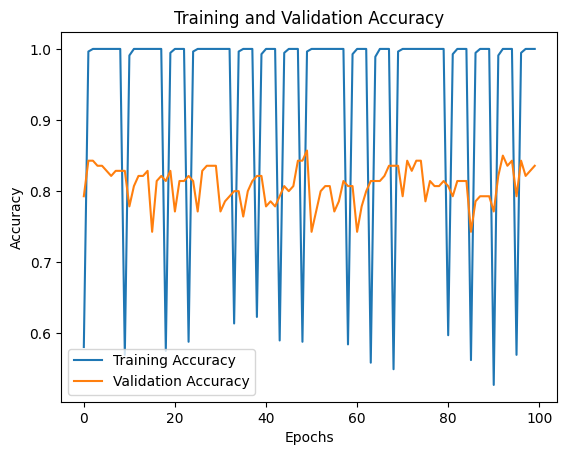

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def graph(accuracies, training_accs):
    """
    Graph the accuracies and training accuracies.
    """
    plt.plot(training_accs, label='Training Accuracy')
    plt.plot(accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

_, _, train_accs, best_model = train(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)

best_model.eval()
val_logits = best_model(X_val_tensor)
y_val_pred = val_logits.max(1)[1]

y_val_pred_onehot = torch.zeros((len(y_val_pred), num_classes), dtype=torch.float32)
y_val_pred_onehot.scatter_(1, y_val_pred.unsqueeze(1), 1.0)

y_val_onehot = torch.zeros((len(y_val_tensor), num_classes), dtype=torch.float32)
y_val_onehot.scatter_(1, y_val_tensor.unsqueeze(1), 1.0)

labels = pd.DataFrame(np.vstack((y_val_onehot.cpu().numpy().T, y_val_pred_onehot.cpu().numpy().T)),
                      index=[f"True_{label}" for label in categories] + [f"Pred_{label}" for label in categories])

plt.figure(figsize=(10, 8))
sns.heatmap(labels, annot=True, cmap="YlGnBu")
plt.title("True vs Predicted Labels")
plt.xlabel("Number of Samples")
plt.show()

graph(accuracies, train_accs)